In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import datetime


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving TSLA (2).csv to TSLA (2).csv


In [ ]:
bit_df = pd.read_csv('BINANCE_BTCUSDT, 1D.csv', date_parser = True)
bit_df.tail()

,time,open,high,low,close
1556,2021-11-20T00:00:00Z,58057.10,59845.00,57353.00,59707.51
1557,2021-11-21T00:00:00Z,59707.52,60029.76,58486.65,58622.02
1558,2021-11-22T00:00:00Z,58617.70,59444.00,55610.00,56247.18
1559,2021-11-23T00:00:00Z,56243.83,58009.99,55317.00,57541.27
1560,2021-11-24T00:00:00Z,57541.26,57735.00,55837.00,56750.11


In [ ]:
bit_df['time']=pd.to_datetime(bit_df['time'])
bit_df['time']=bit_df['time'].apply(lambda x:x.date())
bit_df['time']=bit_df['time'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving TSLA (2).csv to TSLA (2).csv


In [ ]:
tesla_df=pd.read_csv("TSLA (2).csv")
tesla_df=tesla_df[["Date","Close"]]
tesla_df=tesla_df.rename(columns={"Date":"time","Close":"TSLA_close"})

tesla_df.head()

,time,TSLA_close
0,2017-08-17,70.384003
1,2017-08-18,69.491997
2,2017-08-21,67.571999
3,2017-08-22,68.269997
4,2017-08-23,70.554001


In [ ]:
data=pd.merge(bit_df,tesla_df, how="left", on=['time'])

In [ ]:
data.head()

,time,open,high,low,close,TSLA_close
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,70.384003
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,69.491997
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,NaN
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,67.571999


In [ ]:
data["TSLA_close"]=data["TSLA_close"].fillna(method='ffill')

In [ ]:
data.head()

,time,open,high,low,close,TSLA_close
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,70.384003
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,69.491997
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,69.491997
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,69.491997
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,67.571999


In [ ]:
data_training = data[data['time']< '2021-09-01'].copy()
len(data_training)

1476

In [ ]:
data_test = data[data['time']> '2021-09-01'].copy()
len(data_test)


84

In [ ]:
len(data_test2)

85

In [ ]:
data_test.head(20)

,time,open,high,low,close,TSLA_close
1477,2021-09-02,48810.51,50450.13,48584.06,49246.64,732.390015
1478,2021-09-03,49246.63,51000.00,48316.84,49999.14,733.570007
1479,2021-09-04,49998.00,50535.69,49370.00,49915.64,733.570007
1480,2021-09-05,49917.54,51900.00,49450.00,51756.88,733.570007
1481,2021-09-06,51756.88,52780.00,50969.33,52663.90,733.570007
1482,2021-09-07,52666.20,52920.00,42843.05,46863.73,752.919983
1483,2021-09-08,46868.57,47340.99,44412.02,46048.31,753.869995
1484,2021-09-09,46048.31,47399.97,45513.08,46395.14,754.859985
1485,2021-09-10,46395.14,47033.00,44132.29,44850.91,736.270020
1486,2021-09-11,44842.20,45987.93,44722.22,45173.69,736.270020


In [ ]:
 training_data = data_training.drop(['time'], axis = 1)
 training_data.head()

,open,high,low,close,TSLA_close
0,4261.48,4485.39,4200.74,4285.08,70.384003
1,4285.08,4371.52,3938.77,4108.37,69.491997
2,4108.37,4184.69,3850.00,4139.98,69.491997
3,4120.98,4211.08,4032.62,4086.29,69.491997
4,4069.13,4119.62,3911.79,4016.00,67.571999


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01777651, 0.01963201, 0.0233728 , 0.0181509 , 0.04082399],
       [0.01816732, 0.01778279, 0.01894786, 0.01522456, 0.03977122],
       [0.01524103, 0.01474873, 0.01744844, 0.01574803, 0.03977122],
       ...,
       [0.75690695, 0.7528037 , 0.75917673, 0.75479126, 0.79798083],
       [0.7547954 , 0.74072689, 0.74381366, 0.72523274, 0.82039329],
       [0.72523722, 0.73029288, 0.74122933, 0.72718651, 0.82607017]])

In [ ]:
scaler.scale_

array([1.65598556e-05, 1.62396979e-05, 1.68910359e-05, 1.65601353e-05,
       1.18022505e-03])

In [ ]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i])
X_train, Y_train = np.array(X_train), np.array(Y_train)

    

In [ ]:
training_data.shape

(1476, 5)

In [ ]:
X_train.shape

(1416, 60, 5)

In [ ]:
Y_train.shape

(1416, 5)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =5))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)


Epoch 1/20
26/26 [==============================] - 14s 402ms/step - loss: 0.0038 - val_loss: 0.0101
Epoch 2/20
26/26 [==============================] - 10s 386ms/step - loss: 0.0032 - val_loss: 0.0093
Epoch 3/20
26/26 [==============================] - 10s 387ms/step - loss: 0.0031 - val_loss: 0.0071
Epoch 4/20
26/26 [==============================] - 10s 384ms/step - loss: 0.0035 - val_loss: 0.0093
Epoch 5/20
26/26 [==============================] - 10s 381ms/step - loss: 0.0030 - val_loss: 0.0074
Epoch 6/20
26/26 [==============================] - 10s 385ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 7/20
26/26 [==============================] - 10s 384ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 8/20
26/26 [==============================] - 10s 378ms/step - loss: 0.0032 - val_loss: 0.0109
Epoch 9/20
26/26 [==============================] - 10s 376ms/step - loss: 0.0029 - val_loss: 0.0112
Epoch 10/20
26/26 [==============================] - 10s 379ms/step - loss: 0.0027 - val_lo

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['time'], axis = 1)
df.head()

,open,high,low,close,TSLA_close
0,33786.54,34945.61,33316.73,34669.13,678.900024
1,34669.12,35967.85,34357.15,35286.51,678.900024
2,35288.13,35293.78,33125.55,33690.14,678.900024
3,33690.15,35118.88,33532.00,34220.01,659.580017
4,34220.02,35059.09,33777.77,33862.12,644.650024


In [ ]:
inputs = scaler.transform(df)
inputs[0]

array([0.50670724, 0.51429678, 0.51517204, 0.52131488, 0.75900984])

In [ ]:
inputs[0, 0]

0.5067072383128819

In [ ]:
scale0 = 1/scaler.scale_[0]
scale1 = 1/scaler.scale_[1]
scale2 = 1/scaler.scale_[2]
scale3 = 1/scaler.scale_[3]
scale4 = 1/scaler.scale_[4]

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
        X_test.append(inputs[i-60:i])
        Y_test.append(inputs[i, 3])
X_test, Y_test = np.array(X_test), np.array(Y_test)
Y_test = Y_test*scale3 

In [ ]:
X_test.shape

(85, 60)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def forecast_for_days(days):  #Number of days of prediction
  
  X_test2=np.zeros((84,60,5))
  for i in range(0,84,days): #days is prediction of how many days you want
    X_test2[i,:,:]=X_test[i,:,:].copy() #first true

  compare_array=np.zeros((60,5)) 
  for i in range(0,84):
    if np.array_equal(X_test2[i,:,:],compare_array) is True:
      a=X_test2[i-1,:,:].reshape(1,60,5)
      temp=model.predict(a)
      b=np.concatenate((X_test2[i-1,1:,:], temp))
      X_test2[i,:,:]=b  

  Y_pred = model.predict(X_test2)

  Y_pred[:,0] = Y_pred[:,0]*scale0
  Y_pred[:,1] = Y_pred[:,1]*scale1
  Y_pred[:,2] = Y_pred[:,2]*scale2
  Y_pred[:,3] = Y_pred[:,3]*scale3
  Y_pred[:,4] = Y_pred[:,4]*scale4

  return Y_pred[:,3],days


In [ ]:
def forecast_for_days(days):  #Number of days of prediction
  
  X_test2=np.zeros((84,60))
  for i in range(0,84,days): #days is prediction of how many days you want
    X_test2[i,:]=X_test[i,:].copy() #first true

  compare_array=np.zeros((60,1)) 
  for i in range(0,84):
    if np.array_equal(X_test2[i,:],compare_array) is True:
      a=X_test2[i-1,:].reshape(1,60)
      temp=model.predict(a)
      b=np.concatenate((X_test2[i-1,1:], temp))
      X_test2[i,:]=b  

  Y_pred = model.predict(X_test2)

  Y_pred[:,0] = Y_pred[:,0]*scale3
  # Y_pred[:,1] = Y_pred[:,1]*scale1
  # Y_pred[:,2] = Y_pred[:,2]*scale2
  # Y_pred[:,3] = Y_pred[:,3]*scale3

  return Y_pred,days


In [ ]:
prediction,days = forecast_for_days(1)

prediction for 1 days


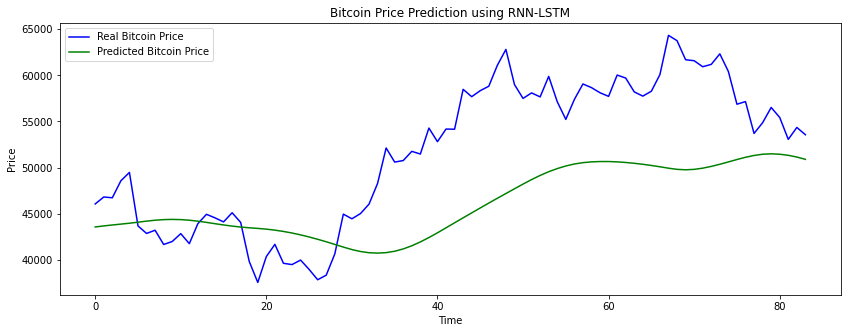

MAPE:  0.14088464061533523


In [ ]:
print("prediction for",days,"days")
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'blue', label = 'Real Bitcoin Price')
plt.plot(prediction, color = 'green', label = 'Predicted Bitcoin Price')
temp_x=np.arange(0,len(prediction),days)
#plt.plot(temp_x,prediction[:,3][0::days],'o',color='r')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print("MAPE: ", mean_absolute_percentage_error(prediction,Y_test))